# This is an example how to use `adjustText` for `plotnine` 

I was missing the `ggrepel` package from ggplot2 quite a bit, but this seems to be a straight forward solution!

by Vito Zanotelli, vito.zanotelli@gmail.com

In [1]:
import plotnine as gg
import pandas as pd
from adjustText import adjust_text
%matplotlib inline

This example uses the mpg cars dataset

In [2]:
url_mpg = 'https://gist.githubusercontent.com/omarish/5687264/raw/7e5c814ce6ef33e25d5259c1fe79463c190800d9/mpg.csv'

In [3]:
dat = pd.read_csv(url_mpg)

In [4]:
dat.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
col_mpg = 'mpg'
col_cylinders = 'cylinders'
col_modelyear = 'model_year'
col_acceleration = 'acceleration'
col_weight = 'weight'
col_name = 'name'

This plots the acceleration of the car versus the milage per gallon (=fuel efficiency).
The plot is facetted by number of cylinders. Colors represent the car weight.

What can be seen is that in general heavier cars have more cylinders and a lower full efficiency.
It could be potentially interesting to highlight to most and least fuel efficient cars.

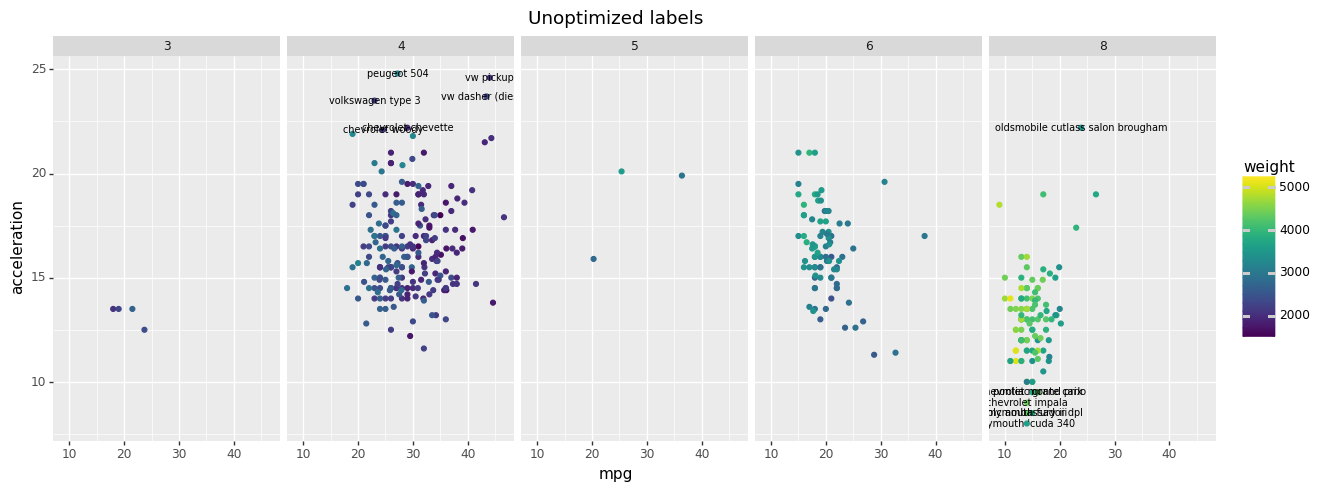

<ggplot: (-9223371911538607828)>

In [6]:
fil = (dat[col_acceleration] < 10) | (dat[col_acceleration] > 22)
p = (gg.ggplot(dat, gg.aes(x=col_mpg, y=col_acceleration))+
     gg.facet_grid('.~{}'.format(col_cylinders))+
     gg.geom_point(gg.aes(color=col_weight))+
     gg.geom_text( gg.aes(label=col_name), data=dat.loc[fil,], size=7)+
     gg.theme(figure_size=(15,5))
)
    
p + gg.ggtitle('Unoptimized labels')

Unfortunately without further optimizatios the labels are not readable.

The 'built in' way to do this with plotnine is using `nudge_x/y` - however this does not really solve the problem.

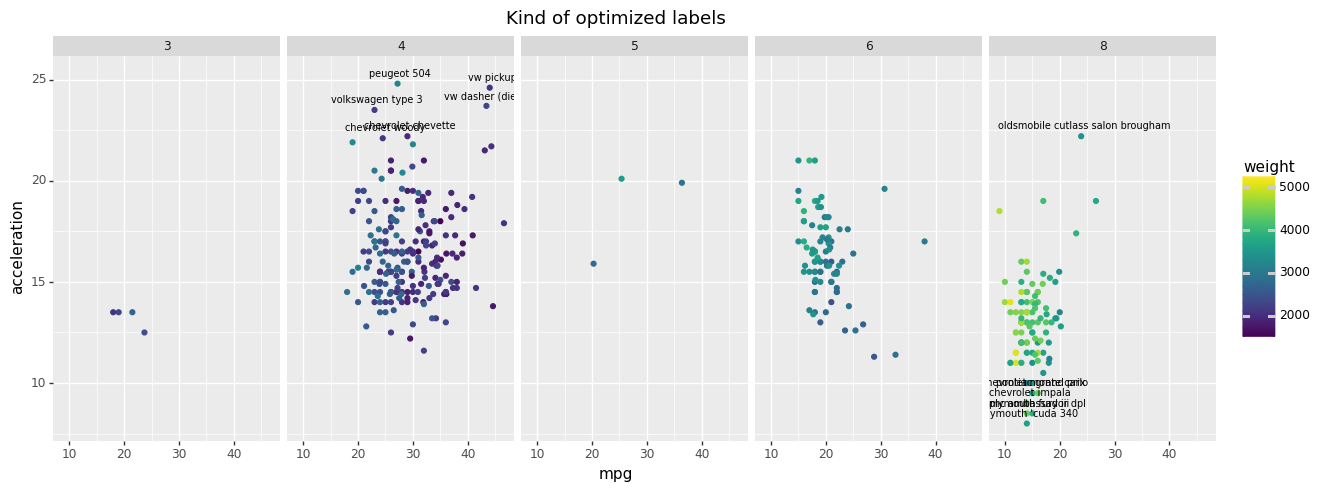

<ggplot: (-9223371911537850364)>

In [7]:
p2 = (gg.ggplot(dat, gg.aes(x=col_mpg, y=col_acceleration))+
     gg.facet_grid('.~{}'.format(col_cylinders))+
     gg.geom_point(gg.aes(color=col_weight))+
     gg.geom_text(gg.aes(label=col_name), data=dat.loc[fil,], nudge_x=0.5, nudge_y=0.5, size=7)+
     gg.theme(figure_size=(15,5))
)
    
p2 + gg.ggtitle('Kind of optimized labels')

However `adjust_text` from the `adjustText` package does the job quite nicely!
https://github.com/Phlya/adjustText

IndexError: list index out of range

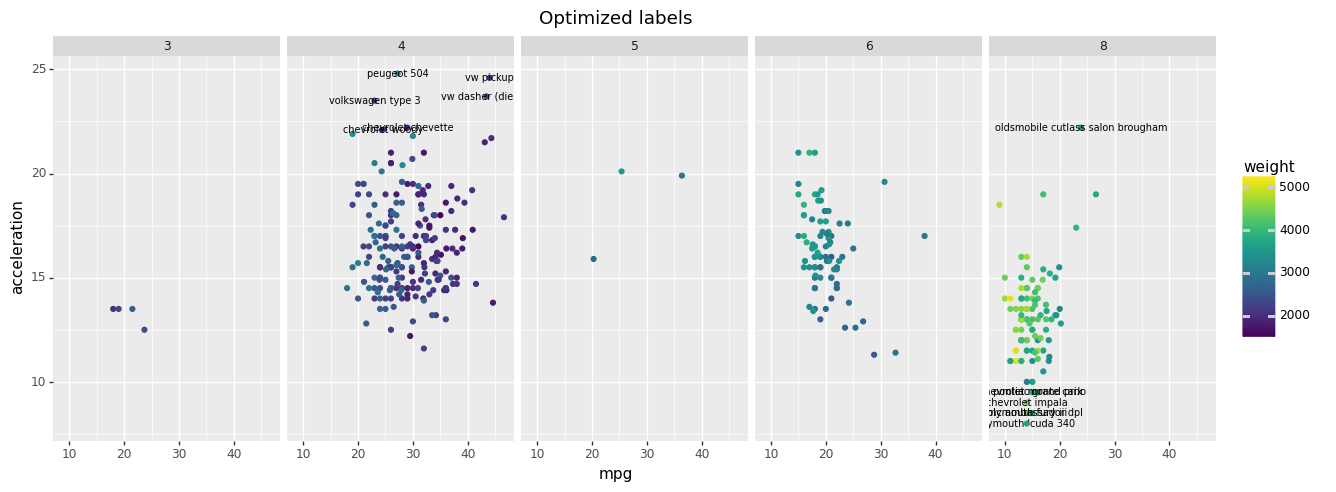

In [8]:
f = (p + gg.ggtitle('Optimized labels')).draw()
for a in f.axes:
    texts = [t for t in  a.texts]
    adjust_text(texts,ax=a, arrowprops=dict(arrowstyle='-', color='grey'))
               

More examples can be found at https://github.com/Phlya/adjustText/wiki

Further steps could be expanding axes limits etc to make all text fit or to fiddle with the `adjust_text` parameters.

https://stackoverflow.com/questions/57701052/how-do-i-use-adjust-text-with-plotnine

In [ ]:
adjust_text_dict = {
    'expand_points': (2, 2),
    'arrowprops': {
        'arrowstyle': '->',
        'color': 'red'
    }
}

In [ ]:
(ggplot(nutrient_rel_item, aes(y='Share_calories', x='Share_biomass', color='Type',show_legend=False))
+stat_smooth( aes(y='Share_calories', x='Share_biomass'),method='lm',inherit_aes=False) 
+geom_text(aes(label='Abb'),data=nutrient_rel_item, nudge_x=0.1, nudge_y=0.1, size=4, adjust_text=adjust_text_dict)
+facet_wrap('~CCC1',nrow=2)
+ scale_x_log10(labels=lambda l: ["%d%%" % (v * 100) for v in l])
+ scale_y_log10(labels=lambda l: ["%d%%" % (v * 100) for v in l])
+ geom_point(size=0.1) 
+ geom_path(aes(group='Item'), arrow= arrow(angle = 15, length= 0.1, type = "closed"))
+ labs(x='x', y='y')
+ theme(legend_position='none'))